<a href="https://colab.research.google.com/github/yulita231/Final-Project-MonkeyPox-Patient-Predictions/blob/main/Eta_TugasDay4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penugasan Hari ke-4: Data Science for Business ISE! 2025

**Halo Unveilers**

Selamat datang di penugasan keempat Data Science for Business ISE! 2025. Setelah mempelajari berbagai model yang telah diajarkan oleh pemateri, sekarang saatnya mengasah kemampuan tim kamu melalui latihan praktis.  
    
Berikut adalah ketentuan penugasannya:  

## 📜 **Ketentuan Penugasan**  
  
  **Topic: Model Klasifikasi dan Evaluasi Metriknya**  


1.   **Decision Tree**
2.   **K-Nearest Neighbors**  
3.   **Neural Network**  
4.   **2 Model Klasifikasi lain**  (bebas selain 3 model di atas dengan peforma lebih baik dibandingkan 3 model diatas)
5.   **Metrik Evaluasi**  
  
  **Instructions:**  


1.   Buat salinan (*Make a copy*) dari Notebook ini atau Download .ipynb dan import ke folder kalian
2. Akses dan unduh dataset pada link berikut : https://drive.google.com/file/d/1EJJ9SjI-otS1f2soO0PkWJ9s80ESLLJX/view?usp=sharing   
3. Ikuti instruksi pada file notebook. Kerjakan secara berkelompok
4. Kumpulkan dalam bentuk Format file: **Nama Tim_TugasDay4.ipynb**

Pengumpulan paling lambat: **Sabtu, 20 September 2025, 08.00 WIB**





## 📌 **Tentang Dataset**  

Tugas ini bertujuan untuk membangun model klasifikasi yang dapat memprediksi **apakah seorang penumpang selamat atau tidak selamat** dalam kecelakaan kapal Sriwijaya **berdasarkan berbagai faktor demografis, sosial, dan ekonomi.**


---



Dataset Kapal Sriwijaya terdiri dari beberapa kolom:
* **PassengerId**: Nomor identitas unik setiap penumpang.
* **Survived**: Status keselamatan penumpang (0 = tidak selamat, 1 = selamat).
* **Pclass**: Kelas tiket penumpang (1 = kelas atas, 2 = kelas menengah, 3 = kelas ekonomi).
* **Name**: Nama lengkap penumpang.
* **Sex**: Jenis kelamin penumpang.
* **Age**: Usia penumpang dalam tahun.
* **SibSp**: Jumlah saudara kandung atau pasangan yang ikut dalam kapal.
* **Parch**: Jumlah orang tua atau anak yang ikut dalam kapal.
* **Ticket**: Nomor tiket penumpang.
* **Fare**: Harga tiket yang dibayarkan penumpang.
* **Cabin**: Nomor kabin penumpang (jika ada).
* **Embarked**: Pelabuhan keberangkatan penumpang


---



## 🧩 **Tugas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = "Kapal-Sriwijaya.csv"

df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Lakukan Exploratory Data Analysis
* Periksa distribusi tiap variabel.
* Identifikasi nilai hilang (missing values).
* Buat visualisasi hubungan antara fitur penting.

/tmp/ipython-input-3689387461.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


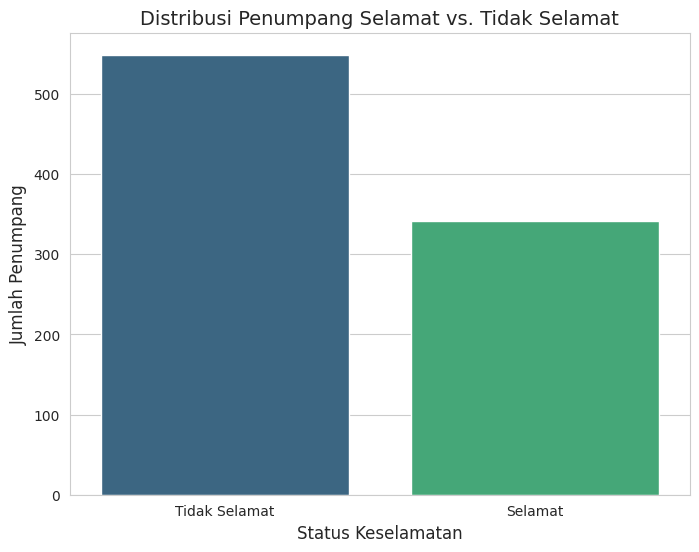

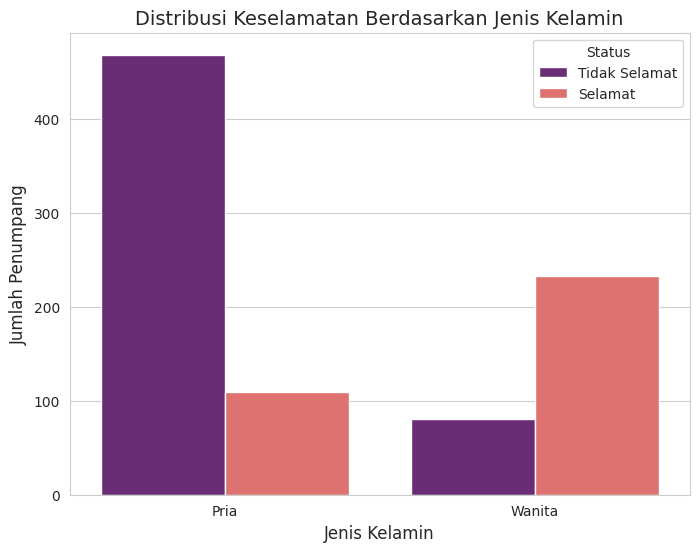

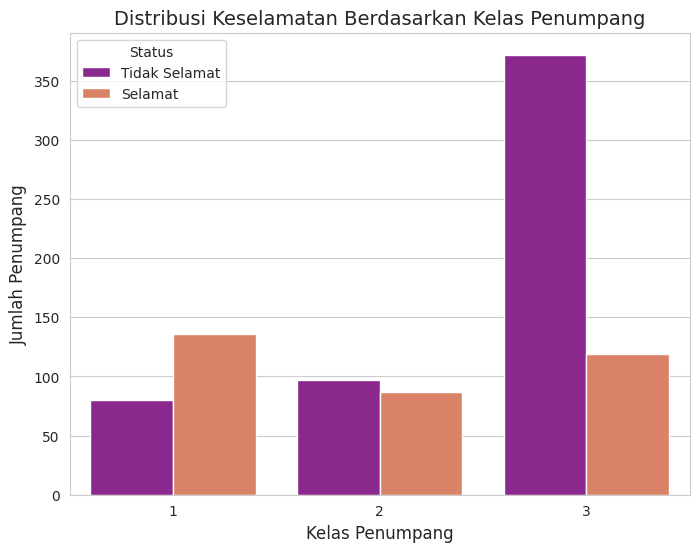

In [ ]:
# Identifikasi missing value
df.isnull().sum()

#visualisasi
# Mengatur gaya plot
sns.set_style("whitegrid")

# Perbandingan Jumlah Korban Selamat vs. Tidak Selamat
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Distribusi Penumpang Selamat vs. Tidak Selamat', fontsize=14)
plt.xlabel('Status Keselamatan', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.show()

# Perbandingan Korban Selamat Berdasarkan Jenis Kelamin (Sex)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='magma')
plt.title('Distribusi Keselamatan Berdasarkan Jenis Kelamin', fontsize=14)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.xticks([0, 1], ['Pria', 'Wanita'])
plt.legend(title='Status', labels=['Tidak Selamat', 'Selamat'])
plt.show()

# Perbandingan Korban Selamat Berdasarkan Kelas Penumpang (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='plasma')
plt.title('Distribusi Keselamatan Berdasarkan Kelas Penumpang', fontsize=14)
plt.xlabel('Kelas Penumpang', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.legend(title='Status', labels=['Tidak Selamat', 'Selamat'])
plt.show()

### 2. Lakukan Data Preprocessing
* Tangani missing values (contoh: imputasi atau drop).
* Normalisasi/standarisasi fitur numerik bila perlu.
* Encoding untuk kolom kategori (sex, embarked, dsb).

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df = df.drop('Cabin', axis=1)
df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### 3. Bangun model klasifikasi
* Gunakan model Decision Tree
* Gunakan model K-Nearest Neighbors
* Gunakan model Neural Network
* Gunakan model Support Vector Machine (SVM)
* Gunakan model Random Forest classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data untuk KNN dan Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("\n========== Decision Tree ==========\n")
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f"Akurasi Decision Tree: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt, target_names=['Tidak Selamat', 'Selamat']))


print("\n========== K-Nearest Neighbors ==========\n")
# Model K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print(f"Akurasi K-Nearest Neighbors: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn, target_names=['Tidak Selamat', 'Selamat']))


print("\n========== Neural Network ==========\n")
# Model Neural Network
nn_model = MLPClassifier(random_state=42, max_iter=1000)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)
print(f"Akurasi Neural Network: {accuracy_score(y_test, y_pred_nn):.4f}")
print(classification_report(y_test, y_pred_nn, target_names=['Tidak Selamat', 'Selamat']))


print("\n========== SVM ==========\n")
# Menginisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model menggunakan data pelatihan
svm_model.fit(X_train, y_train)

# Membuat prediksi pada data pengujian
y_pred_svm = svm_model.predict(X_test)

# Menghitung akurasi model SVM
print(f"Akurasi SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=['Tidak Selamat', 'Selamat']))


print("\n========== Random Forest ==========\n")
# Menginisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model Random Forest
rf_model.fit(X_train, y_train)

# Membuat prediksi pada data pengujian
y_pred_rf = rf_model.predict(X_test)

# Menghitung akurasi model Random Forest
print(f"Akurasi Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf, target_names=['Tidak Selamat', 'Selamat']))


========== Decision Tree ==========

Akurasi Decision Tree: 0.7989
               precision    recall  f1-score   support

Tidak Selamat       0.83      0.83      0.83       105
      Selamat       0.76      0.76      0.76        74

     accuracy                           0.80       179
    macro avg       0.79      0.79      0.79       179
 weighted avg       0.80      0.80      0.80       179


========== K-Nearest Neighbors ==========

Akurasi K-Nearest Neighbors: 0.8101
               precision    recall  f1-score   support

Tidak Selamat       0.82      0.87      0.84       105
      Selamat       0.79      0.73      0.76        74

     accuracy                           0.81       179
    macro avg       0.81      0.80      0.80       179
 weighted avg       0.81      0.81      0.81       179


========== Neural Network ==========

Akurasi Neural Network: 0.8156
               precision    recall  f1-score   support

Tidak Selamat       0.81      0.90      0.85       105
     

### 4. Evaluasi performa model dengan metrik:
* Tentukan 3 metrik evaluasi untuk mengukur peforma tiap model
* Bandingkan peforma tiap model


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Masukkan model yang telah kita pilih
models_predictions = [
    ("Decision Tree", y_pred_dt),
    ("K-Nearest Neighbors", y_pred_knn),
    ("Neural Network", y_pred_nn),
    ("SVM", y_pred_svm),
    ("Random Forest", y_pred_rf)
]

# Buat datframe untuk menyimpan hasil evaluasi kita
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Loop untuk menghitung metrik tiap model
for name, y_pred in models_predictions:
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results = pd.concat([results, pd.DataFrame({
        "Model": [name],
        "Accuracy": [acc],
        "Precision": [prec],
        "Recall": [rec],
        "F1-Score": [f1]
    })], ignore_index=True)

# Tampilkan perbandingan performa
print("\n========== Perbandingan Performansi Model ==========\n")
print(results.sort_values(by="F1-Score", ascending=False).reset_index(drop=True))



========== Perbandingan Performansi Model ==========

                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.826816   0.811594  0.756757  0.783217
1  K-Nearest Neighbors  0.810056   0.794118  0.729730  0.760563
2       Neural Network  0.815642   0.825397  0.702703  0.759124
3        Decision Tree  0.798883   0.756757  0.756757  0.756757
4                  SVM  0.782123   0.753623  0.702703  0.727273


/tmp/ipython-input-185921735.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


### 5. Buat kesimpulan:
* Buat simpulan model dengan peforma terbaik dan paling cocok dalam kasus tersebut

**Kesimpulan Performa Model**
Dari perbandingan metrik evaluasi yang telah dilakukan, model Random Forest Classifier menunjukkan performa terbaik dengan nilai F1-Score tertinggi.

   Model Terbaik: Random Forest Classifier

**Alasan**: Nilai F1-Score yang tinggi pada model Random Forest menunjukkan adanya keseimbangan yang sangat baik antara Presisi (seberapa akurat prediksi positif) dan Recall (seberapa baik model menemukan semua kasus positif yang sebenarnya). Hal ini menandakan bahwa model tidak hanya akurat secara keseluruhan, tetapi juga sangat andal dalam memprediksi kelas Survived (1) tanpa membuat terlalu banyak kesalahan.


Model Random Forest adalah jenis model ensemble yang membangun banyak pohon keputusan (Decision Tree) secara acak dan menggabungkan hasilnya. Keunggulan ini membuatnya sangat kokoh dan tahan terhadap overfitting (terlalu spesifik pada data pelatihan) yang sering terjadi pada model tunggal seperti Decision Tree.

Dalam kasus seperti prediksi keselamatan penumpang, di mana model harus mengenali pola kompleks dari berbagai fitur, kemampuan Random Forest untuk menggabungkan kekuatan dari banyak pohon membuatnya menjadi pilihan yang paling andal dan efektif.

### 6. Pembagian Kerja
Tulis pembagian kerja mengenai apa saja yang dikerjakan oleh masing-masing anggota. Harapannya, setidaknya masing-masing anggota mengerjakan 1 model.
* Anggota 1 : **OKTA**, mengerjakan pre processing data ke 3 model yang sudah di tentukan, KNN, decision tree, dan neural network, serta bagian 4 evaluasi performa semua model, untuk dilihat perbandingannya
* Anggota 2 : **YULITA**, mengerjakan 2 model diluar yang di tentukan, yaitu dengan memilih model random forest classifier dan SVM untuk melakukan analisis, juga mengerjakan kesimpulan dari awal hingga akhir dalam informasi penting yang di dapatkan.
* Anggota 3 : tidak ada